In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# zerodha----paid data
# alphavantage----no NSE/BSE data
# quandl----no intraday data
# yfinance----working

# https://algotrading101.com/learn/google-finance-api-guide/
# https://github.com/ranaroussi/yfinance

In [2]:
!pip install autoscraper
!pip install python-dateutil
!pip install yfinance

     |████████████████████████████████| 5.5MB 12.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=7ad4b290854ce84f7b6fe4bb938e27956cbad6a7a34de0660d646e2aa3622d85
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#gettting list of NIFTY50 stocks
from autoscraper import AutoScraper

url='https://en.wikipedia.org/wiki/NIFTY_50'
want_list=['ADANIPORTS.NS']

#scrapping data from wikipedia
scraper=AutoScraper()
n50=scraper.build(url,want_list)

n50=n50[0:50]
print(n50)

['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS']


In [4]:
import yfinance as yf
from datetime import date
from dateutil.relativedelta import relativedelta

# we can only get last 60 days intraday day
# so, setting dates accordingly
end=str(date.today())
start=str(date.today()+relativedelta(months=-2,days=+1))

# appending symbols into a single string
symbols_str=""
for s in n50:
    symbols_str+=s+" "
    
# downloading last 60 days intraday(interval=2 mins) data of all symbols
data=yf.download(tickers=symbols_str,interval='2m',auto_adjust=True,start=start,end=end)

[*********************100%***********************]  50 of 50 completed


In [104]:
#checking nan values
close={}
for symbol in n50:
    close[symbol]=data['Close'][symbol].to_numpy()
    print(symbol,np.count_nonzero(np.isnan(close[symbol])))

ADANIPORTS.NS 3
ASIANPAINT.NS 2
AXISBANK.NS 2
BAJAJ-AUTO.NS 2
BAJFINANCE.NS 2
BAJAJFINSV.NS 2
BHARTIARTL.NS 2
BPCL.NS 2
BRITANNIA.NS 2
CIPLA.NS 3
COALINDIA.NS 2
DIVISLAB.NS 3
DRREDDY.NS 2
EICHERMOT.NS 2
GRASIM.NS 3
HCLTECH.NS 2
HDFC.NS 2
HDFCBANK.NS 2
HDFCLIFE.NS 2
HEROMOTOCO.NS 4
HINDALCO.NS 2
HINDUNILVR.NS 2
ICICIBANK.NS 2
INDUSINDBK.NS 2
INFY.NS 2
IOC.NS 2
ITC.NS 2
JSWSTEEL.NS 2
KOTAKBANK.NS 2
LT.NS 1
M&M.NS 2
MARUTI.NS 2
NESTLEIND.NS 3
NTPC.NS 1
ONGC.NS 2
POWERGRID.NS 2
RELIANCE.NS 2
SBIN.NS 2
SBILIFE.NS 2
SHREECEM.NS 4
SUNPHARMA.NS 2
TATAMOTORS.NS 2
TATASTEEL.NS 2
TCS.NS 2
TATACONSUM.NS 2
TECHM.NS 2
TITAN.NS 2
ULTRACEMCO.NS 2
UPL.NS 2
WIPRO.NS 2


In [105]:
#removing nan values
for symbol in n50:
    close[symbol]= [c for c in close[symbol] if not np.isnan(c)] 
    print(symbol,np.count_nonzero(np.isnan(close[symbol])))

ADANIPORTS.NS 0
ASIANPAINT.NS 0
AXISBANK.NS 0
BAJAJ-AUTO.NS 0
BAJFINANCE.NS 0
BAJAJFINSV.NS 0
BHARTIARTL.NS 0
BPCL.NS 0
BRITANNIA.NS 0
CIPLA.NS 0
COALINDIA.NS 0
DIVISLAB.NS 0
DRREDDY.NS 0
EICHERMOT.NS 0
GRASIM.NS 0
HCLTECH.NS 0
HDFC.NS 0
HDFCBANK.NS 0
HDFCLIFE.NS 0
HEROMOTOCO.NS 0
HINDALCO.NS 0
HINDUNILVR.NS 0
ICICIBANK.NS 0
INDUSINDBK.NS 0
INFY.NS 0
IOC.NS 0
ITC.NS 0
JSWSTEEL.NS 0
KOTAKBANK.NS 0
LT.NS 0
M&M.NS 0
MARUTI.NS 0
NESTLEIND.NS 0
NTPC.NS 0
ONGC.NS 0
POWERGRID.NS 0
RELIANCE.NS 0
SBIN.NS 0
SBILIFE.NS 0
SHREECEM.NS 0
SUNPHARMA.NS 0
TATAMOTORS.NS 0
TATASTEEL.NS 0
TCS.NS 0
TATACONSUM.NS 0
TECHM.NS 0
TITAN.NS 0
ULTRACEMCO.NS 0
UPL.NS 0
WIPRO.NS 0


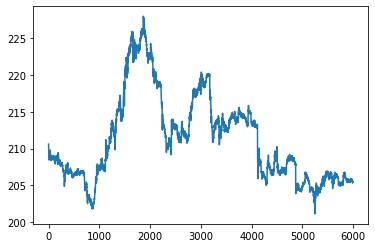

In [106]:
# plot of closing price of ITC stock
plt.plot(close['ITC.NS'])

In [107]:
# scaling data in range (0,1)
from sklearn.preprocessing import MinMaxScaler

scaler={}
for symbol,arr in close.items():
    # defining min max scaler for the symbol
    scaler[symbol]=MinMaxScaler(feature_range=(0,1))
    
    # scaling data
    arr=scaler[symbol].fit_transform(np.array(arr).reshape(-1, 1))
    close[symbol]=np.array(arr)
    

In [108]:
# generate sequence data to feed to RNN
# X:[a0 a1 a2 ...... a59] Y:[a60] seq_size=60

def generate_seq_data(data,input_size,output_size):
    #all elements except last index is X and last index is Y
    seq_data=[]
    for i in range(input_size+output_size-1,len(data)):
        seq_data.append(data[i-input_size-output_size+1:i+1])
        
    return np.array(seq_data,dtype="object").reshape(len(seq_data),input_size+output_size)

seq_data={}
for symbol in n50:
    seq_data[symbol]=generate_seq_data(close[symbol],150,20)


In [109]:
seq_data['ITC.NS'].shape

(5826, 170)

In [110]:
X_train,Y_train,X_test,Y_test=[],[],[],[]
splitted_data={}
input_size=150
output_size=20

for symbol in n50:
    sd=seq_data[symbol]
    
    # splitting in 80:20 ratio
    split_index=int(0.8*len(sd))
    train=sd[0:split_index]
    test=sd[split_index:]
    
    X_train.extend(train[:,:-output_size]) # all columns except last
    Y_train.extend(train[:,-output_size:]) # last column
    
    X_test.extend(test[:,:-output_size]) # all columns except last
    Y_test.extend(test[:,-output_size:]) # last column

    splitted_data[symbol]=[X_train,Y_train,X_test,Y_test]
    
X_train,Y_train,X_test,Y_test=np.array(X_train),np.array(Y_train),np.array(X_test),np.array(Y_test)


In [111]:
print(X_train.shape)
print(Y_train.shape)

(233000, 150)
(233000, 20)


In [112]:
print(X_test.shape)
print(Y_test.shape)

(58293, 150)
(58293, 20)


In [113]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1] ,1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [115]:
# stacked LSTM
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=X_train[0].shape))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(output_size))
model.compile(loss='mean_squared_error',optimizer='adam')

In [116]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 150, 100)          40800     
_________________________________________________________________
dropout_15 (Dropout)         (None, 150, 100)          0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 150, 100)          80400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 150, 100)          0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 20)                2020      
Total params: 203,620
Trainable params: 203,620
Non-trainable params: 0
________________________________________________

In [117]:
X_train=np.asarray(X_train).astype(np.float32)
Y_train=np.asarray(Y_train).astype(np.float32)
X_test=np.asarray(X_test).astype(np.float32)
Y_test=np.asarray(Y_test).astype(np.float32)

In [118]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=128,verbose=1)

Epoch 1/10
1821/1821 [==============================] - 62s 32ms/step - loss: 0.0072 - val_loss: 0.0014
Epoch 2/10
1821/1821 [==============================] - 60s 33ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/10
1821/1821 [==============================] - 60s 33ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/10
1821/1821 [==============================] - 60s 33ms/step - loss: 9.9440e-04 - val_loss: 0.0010
Epoch 5/10
1821/1821 [==============================] - 60s 33ms/step - loss: 9.5741e-04 - val_loss: 0.0011
Epoch 6/10
1821/1821 [==============================] - 60s 33ms/step - loss: 9.4142e-04 - val_loss: 0.0010
Epoch 7/10
1821/1821 [==============================] - 60s 33ms/step - loss: 9.4855e-04 - val_loss: 0.0011
Epoch 8/10
1821/1821 [==============================] - 59s 33ms/step - loss: 9.3045e-04 - val_loss: 9.7616e-04
Epoch 9/10
1821/1821 [==============================] - 60s 33ms/step - loss: 9.4413e-04 - val_loss: 9.7328e-04
Epoch 10/10
1821/1821 [=========

In [119]:
pred=model.predict(X_test)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_test,pred))

0.03179366524649715

In [170]:
symbol='ITC.NS'
stock=close[symbol]

iters=200
keep=5

old=stock[:-iters].flatten()
for i in range(0,int(iters/keep)):
    seq=old[-input_size:]
    seq=seq.reshape(1,input_size,1)
    pred=np.array(model.predict(seq))[0]
    old=np.concatenate((old,pred[:keep]),axis=0)

print('prediction done!')

prediction done!


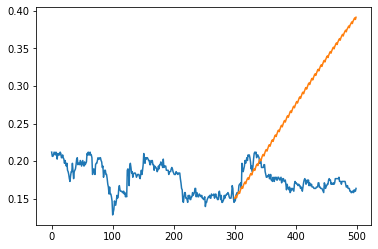

In [171]:
old[:len(stock)-iters]=np.nan
points=500

plt.plot(stock[-points:])
plt.plot(old[-points:])
plt.show()

In [ ]:
model.save('stox.h5')